In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import json


import tensorflow as tf
from tensorflow import keras
import os
from varname import nameof
import matplotlib.pyplot as plt
import seaborn as sns

experiment_n = 1

In [11]:
def plot_acc(history, num_classes, experiment_n, experiment_name):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{num_classes}-{experiment_name} model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(f'./plots/ex_n_{experiment_n}_on_{experiment_name}_with_{num_classes}_classes_accuracy.png')
    plt.show()

def plot_loss(history, num_classes, experiment_n, experiment_name):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{num_classes}-{experiment_name} model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig(f'./plots/ex_n_{experiment_n}_on_{experiment_name}_with_{num_classes}_classes_loss.png')
    plt.show()

def plot_cm(confusion_matrix, classes, num_classes, experiment_n, experiment_name):
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix, xticklabels=classes, yticklabels=classes, annot=True, cmap="YlGnBu")
    plt.title(f'{num_classes}-{experiment_name} model confusion matrix')
    plt.xlabel('Pred')
    plt.ylabel('True')
    plt.savefig(f'./plots/ex_n_{experiment_n}_on_{experiment_name}_with_{num_classes}_classes_confusion_m.png')
    plt.show()

In [100]:
label_to_playlists = {
    # 'jazz_playlists'      : 1,
    'classical_playlists' : 2,
    # 'indie_playlists'     : 3,
    # 'country_playlists'   : 4,
    'rock_playlists'      : 5,
    # 'pop_playlists'       : 6,
    'hip_hop_playlists'   : 7,
    'edm_playlists'       : 8
}
num_classes = len(label_to_playlists.keys())
label = 0
experiment_name = "genre"
all_features_df = None
all_labels_df = None
experiment_n += 1

for name, original_label in label_to_playlists.items():
    playlists_df = None
    path = os.path.join(os.getcwd(), "data", f"{name}_label_{original_label}.csv")
    dataframe = pd.read_csv(path)
    dataframe = dataframe.drop_duplicates(subset='track_id', keep=False)
    labels = dataframe.pop('label')
    labels = labels.astype('float32')
    labels.values[:] = label
    features = dataframe.drop(['Unnamed: 0', 'track_id'], axis=1)
    features.astype('float32') 
    if all_features_df is None:
        all_features_df = features
    else:
        all_features_df = pd.concat(
                [all_features_df, features],
                axis=0,
                join="outer",
                ignore_index=False,
                keys=None,
                levels=None,
                names=None,
                verify_integrity=False,
                copy=True,
            )
    if all_labels_df is None:
        all_labels_df = labels
    else:
        all_labels_df = pd.concat(
                [all_labels_df, labels],
                axis=0,
                join="outer",
                ignore_index=False,
                keys=None,
                levels=None,
                names=None,
                verify_integrity=False,
                copy=True,
            )
    label+=1

Epoch 1/500
12/12 [==============================] - 1s 22ms/step - loss: 2.7007 - accuracy: 0.2892 - val_loss: 2.8378 - val_accuracy: 0.2757
Epoch 2/500
12/12 [==============================] - 0s 6ms/step - loss: 2.6062 - accuracy: 0.2838 - val_loss: 2.7025 - val_accuracy: 0.2757
Epoch 3/500
12/12 [==============================] - 0s 6ms/step - loss: 2.4944 - accuracy: 0.3041 - val_loss: 2.5640 - val_accuracy: 0.2757
Epoch 4/500
12/12 [==============================] - 0s 5ms/step - loss: 2.3963 - accuracy: 0.2851 - val_loss: 2.4343 - val_accuracy: 0.2757
Epoch 5/500
12/12 [==============================] - 0s 5ms/step - loss: 2.2872 - accuracy: 0.2932 - val_loss: 2.3148 - val_accuracy: 0.2757
Epoch 6/500
12/12 [==============================] - 0s 5ms/step - loss: 2.1735 - accuracy: 0.3135 - val_loss: 2.1823 - val_accuracy: 0.2757
Epoch 7/500
12/12 [==============================] - 0s 4ms/step - loss: 2.1008 - accuracy: 0.2743 - val_loss: 2.0619 - val_accuracy: 0.2757
Epoch 8/500


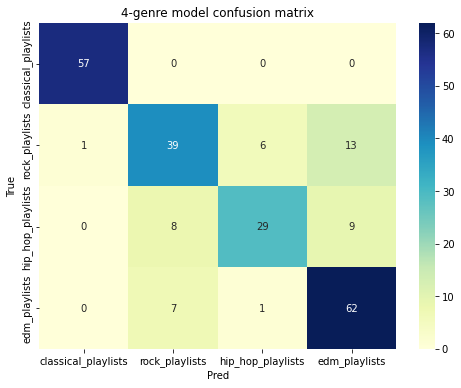

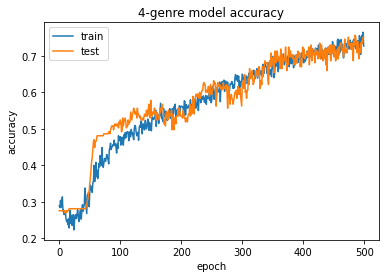

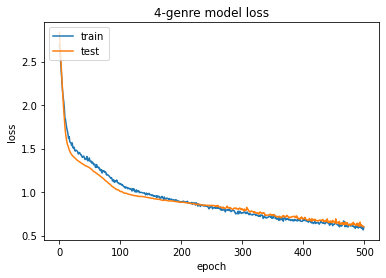

8/8 [==============================] - 0s 2ms/step - loss: 0.4988 - accuracy: 0.8060


In [102]:

x_train, x_test, y_train, y_test = train_test_split(all_features_df, all_labels_df, test_size=0.20)

activation = keras.layers.ReLU()

model = keras.models.Sequential([
    keras.Input(shape=(11,)),
    keras.layers.Dense(num_classes*16, activation=activation),
    keras.layers.Dense(num_classes*8, activation=activation),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(num_classes*8, activation=activation),
    keras.layers.Dense(num_classes*4, activation=activation),
    keras.layers.LayerNormalization(),
    keras.layers.Dense(num_classes),
    keras.layers.Softmax()
])

lr = 0.001
optimizer = keras.optimizers.Adam(learning_rate=0.00005)
# optimizer = keras.optimizers.Adadelta(learning_rate=lr, rho=0.95, epsilon=1e-07, name="Adadelta")
# optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
# optimizer = keras.optimizers.Adamax(
#     learning_rate=0.0001,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07
# )


model.compile(optimizer=optimizer, loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    # steps_per_epoch=20,
    epochs=500,
    # validation_steps=5,
    # verbose=2,
    validation_split=0.2)

print(model.evaluate(
    x=x_test,
    y=y_test,
))

preds = model.predict(x_test)
preds = tf.argmax(preds, axis=-1)
confusion_matrix = tf.math.confusion_matrix(y_test, preds, num_classes=num_classes)


plot_cm(confusion_matrix, label_to_playlists.keys(), num_classes, experiment_n, experiment_name)
plot_acc(history, num_classes, experiment_n, experiment_name)
plot_loss(history, num_classes, experiment_n, experiment_name)

experiment_summary = {}
experiment_summary[experiment_name] = list(label_to_playlists.keys())
experiment_summary["number of classes"] = num_classes
experiment_summary['evaluation'] = model.evaluate(
    x=x_test,
    y=y_test,
)
experiment_summary['parameters'] = history.params
experiment_summary['optimizer'] = {
    'name': optimizer._name,
    'lr': lr
}
stringlist = []
model.summary(print_fn=lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)
experiment_summary['model'] = short_model_summary

with open(f'./results/ex_n_{experiment_n}_on_{experiment_name}_with_{num_classes}_classes_confusion_m.json', 'w') as fp:
    json.dump(experiment_summary, fp)
